In [1]:
import os
import pandas as pd
import requests
import sys
sys.path.append('../src')
import apilast as als
import sqltools as sqt

from PIL import Image
from io import BytesIO



In [2]:
l_user = 'sinatxester'
limit = 1000
uts_num = sqt.maxuts() + 1
keylast = os.getenv("keylast")

In [3]:
 #lastf key para la api
url = f'http://ws.audioscrobbler.com/2.0/?method=user.getrecenttracks&user={l_user}&limit={limit}&from={uts_num}&api_key={keylast}&format=json'

In [4]:
req = requests.get(url).json()

In [5]:
#requests.get(url).json()

In [6]:
req['recenttracks']['track'][0].keys()

dict_keys(['artist', 'streamable', 'image', 'mbid', 'album', 'name', 'url', 'date'])

In [7]:
#req['recenttracks']['track']

In [8]:
if '@attr' in req['recenttracks']['track'][0].keys():
    print(req['recenttracks']['track'][0].keys())
else:
    print(req['recenttracks']['track'][0].keys())
#exists(req['recenttracks']['track'][0]['@attr'])

dict_keys(['artist', 'streamable', 'image', 'mbid', 'album', 'name', 'url', 'date'])


In [9]:
req['recenttracks']['track'][0].keys()

dict_keys(['artist', 'streamable', 'image', 'mbid', 'album', 'name', 'url', 'date'])

In [10]:
requests.get(url).json()['recenttracks']['track'][0]

{'artist': {'mbid': 'f1899faf-50de-4bf5-9939-bb2e720e629b',
  '#text': 'Kiko Veneno'},
 'streamable': '0',
 'image': [{'size': 'small',
   '#text': 'https://lastfm.freetls.fastly.net/i/u/34s/236666ca368671717a2b6a74f1c1a285.jpg'},
  {'size': 'medium',
   '#text': 'https://lastfm.freetls.fastly.net/i/u/64s/236666ca368671717a2b6a74f1c1a285.jpg'},
  {'size': 'large',
   '#text': 'https://lastfm.freetls.fastly.net/i/u/174s/236666ca368671717a2b6a74f1c1a285.jpg'},
  {'size': 'extralarge',
   '#text': 'https://lastfm.freetls.fastly.net/i/u/300x300/236666ca368671717a2b6a74f1c1a285.jpg'}],
 'mbid': 'cc0a5991-8962-4bf5-95bf-c682369a0f44',
 'album': {'mbid': 'adecb474-9288-4c7a-94af-40f89ba2a4a1',
  '#text': 'Sombrero roto'},
 'name': 'Miss you',
 'url': 'https://www.last.fm/music/Kiko+Veneno/_/Miss+you',
 'date': {'uts': '1646847435', '#text': '09 Mar 2022, 17:37'}}

In [15]:
img_src = requests.get(url).json()['recenttracks']['track'][1]['image'][3]['#text']
img_src

'https://lastfm.freetls.fastly.net/i/u/300x300/236666ca368671717a2b6a74f1c1a285.jpg'

In [16]:
response = requests.get(img_src)
response

<Response [200]>

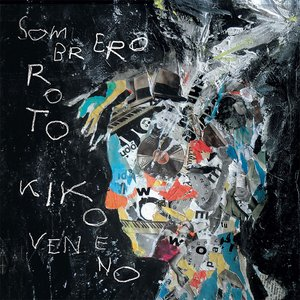

In [17]:

image = Image.open(BytesIO(response.content))
image.show()

![](imagen)


In [13]:
#print(f'Now playing {requests.get(url).json()['recenttracks']['track'][0]['artist']} - {requests.get(url).json()['recenttracks']['track'][0]['name']}')

```PYTHON
req['recenttracks']['track'][0]
'@attr': {'nowplaying': 'true'},
```

In [17]:
for r in req['recenttracks']['track']:
    print(r.get('date',0))


0
{'uts': '1644261919', '#text': '07 Feb 2022, 19:25'}
{'uts': '1644261734', '#text': '07 Feb 2022, 19:22'}
{'uts': '1644261601', '#text': '07 Feb 2022, 19:20'}
{'uts': '1644261345', '#text': '07 Feb 2022, 19:15'}
{'uts': '1644261118', '#text': '07 Feb 2022, 19:11'}
{'uts': '1644260962', '#text': '07 Feb 2022, 19:09'}
{'uts': '1644260806', '#text': '07 Feb 2022, 19:06'}
{'uts': '1644260586', '#text': '07 Feb 2022, 19:03'}
{'uts': '1644260421', '#text': '07 Feb 2022, 19:00'}
{'uts': '1644260162', '#text': '07 Feb 2022, 18:56'}
{'uts': '1644259407', '#text': '07 Feb 2022, 18:43'}
{'uts': '1644258911', '#text': '07 Feb 2022, 18:35'}
{'uts': '1644258731', '#text': '07 Feb 2022, 18:32'}
{'uts': '1644258486', '#text': '07 Feb 2022, 18:28'}
{'uts': '1644258206', '#text': '07 Feb 2022, 18:23'}
{'uts': '1644258019', '#text': '07 Feb 2022, 18:20'}
{'uts': '1644257922', '#text': '07 Feb 2022, 18:18'}
{'uts': '1644257691', '#text': '07 Feb 2022, 18:14'}
{'uts': '1644257585', '#text': '07 Feb 2022,

In [18]:
def req_lastfm (l_user,limit,lastuts):
    '''
    recibe parámetros para el endopint de la api de lastfm de rectents tracks de un usuario
    l_user: cadena de texto, nombre del usuario
    limit: integer del 1 a 1000 (preferible 1000) #si sabemos cuántos scrobbles hay y son menos de 1000 podemos poner un número
    lastuts: int el último uts registrado en la base de datos de mysql (fecha en segundos)
    devuelve un diccionario (json) con los últimos tracks
    '''
    uts_num = lastuts + 1 #le sumamos uno al uts recibido para no tenerlo en cuenta porque ya está en la base de datos
    keylast = os.getenv("keylast") #lastf key para la api
    url = f'http://ws.audioscrobbler.com/2.0/?method=user.getrecenttracks&user={l_user}&limit={limit}&from={uts_num}&api_key={keylast}&format=json'
    req = requests.get(url).json()
    if req['recenttracks']['@attr']['totalPages'] == '0':
        return 'No hay nuevos scrobbles'
    
    elif req['recenttracks']['@attr']['totalPages'] == '1':
        if req['recenttracks']['track'][0]['@attr'] == {'nowplaying': 'true'}:
            art_play = req['recenttracks']['track'][0]['artist']['#text']
            tit_play = req['recenttracks']['track'][0]['name']
            print(f'Now playing {art_play} by {tit_play}')
            return als.df_fromtracks(req['recenttracks']['track'][1:])
        else:
            tracks = req['recenttracks']['track']            
            return als.df_fromtracks(tracks)
    else:
        lista_lista = []
        pages = int(req['recenttracks']['@attr']['totalPages'])
        if req['recenttracks']['track'][0]['@attr'] == {'nowplaying': 'true'}:
            art_play = req['recenttracks']['track'][0]['artist']['#text']
            tit_play = req['recenttracks']['track'][0]['name']
            print(f'Now playing {art_play} by {tit_play}')
            for i in range(1,pages+1):
                url_p = f'http://ws.audioscrobbler.com/2.0/?method=user.getrecenttracks&user={l_user}&limit={limit}&from={uts_num}&page={page}&api_key={keylast}&format=json'
                rq_p = requests.get(url_p).json()['recenttracks']['track']
                lista_lista.append(rq_p)
            tracks = [l for lista in lista_lista for l in lista]
            tracks.pop(0)
            return als.df_fromtracks(tracks)
        else:
        
            for i in range(1,pages+1):
                page = i
                url_p = f'http://ws.audioscrobbler.com/2.0/?method=user.getrecenttracks&user={l_user}&limit={limit}&from={uts_num}&page={page}&api_key={keylast}&format=json'
                rq_p = requests.get(url_p).json()['recenttracks']['track']
                lista_lista.append(rq_p)
            tracks = [l for lista in lista_lista for l in lista]
        
            return als.df_fromtracks(tracks) #llamamos a la función df_fromtracks

In [19]:
l_user = 'sinatxester'
limit = 1000
lastuts = sqt.maxuts()
keylast = os.getenv("keylast")

In [20]:
recent = req_lastfm (l_user,limit,lastuts)

Now playing Leonard Cohen by Jazz Police


In [21]:
recent

,uts,artist,artist_mbid,album,album_mbid,title,track_mbid
0,1644262071,Leonard Cohen,65314b12-0e08-43fa-ba33-baaa7b874c15,I'm Your Man,111c9d79-1193-4f8f-986e-7ee3e370fd70,Jazz Police,039b2d00-db5b-4a09-96c4-b54f674433cc
1,1644261919,Los Secretos,ec5872e7-9d15-4624-b949-c82e700fd2e9,El Primer Cruce,cc5a5c08-8a7b-4056-9ddc-352ad1d1aa2f,Cerrar los bares,3533b0c8-de9b-3580-8c64-ddb922fb8979
2,1644261734,ROSALÍA,,El Mal Querer,,Malamente (Cap. 1: Augurio),
3,1644261601,Melora Creager,e8508092-0f85-46ef-8564-6dfdacffe01a,Melora A La Basilica,2ce3d287-9f51-4a52-9a4e-a2a7c5332172,Why Don't You Do Right?,4424d129-4d0a-3fdc-b485-a03f6d0a4ee1
4,1644261345,Joe Cocker,32f2d6bd-c22b-42cf-a7bc-0c4b48cd2bcb,Cocker,42054a7d-04de-4583-83e1-3b3c4ef200d5,You Can Leave Your Hat On,004a1bf4-c58e-43eb-8b96-e506fecea4fa
...,...,...,...,...,...,...,...
60,1643988381,Beyoncé,,Dangerously in Love,07ff5c78-44ca-45b1-944e-e2723ce4d87e,Naughty Girl,5afe48f7-5dc1-43cd-bae2-1ce714df3036
61,1643988027,Britney Spears,45a663b5-b1cb-4a91-bff6-2bef7bbfdd76,Blackout,0055dbfb-9bf5-45d3-9c11-069128ee9212,Gimme More,004ec59f-1b1d-366b-b009-25cf6a2aa1bb
62,1643987604,Matchbox Twenty,,Live From Australia,,Time After Time (Live) (Live Australia),
63,1643987406,Sonata Arctica,319b1175-ced9-438f-986b-9239c3edd92d,The Days of Grays,3d626cfc-1c98-340a-8f61-b9ce8a9cdec1,In the Dark,21188d04-a711-4c89-af76-cf833a89f40c


In [22]:
remplazos = {"'":"\'",'\\':'\\\\','"':'\"'}
remplazos
#artist.replace(remplazos)

{"'": "'", '\\': '\\\\', '"': '"'}

In [23]:
recent.title.replace(remplazos)

0                                 Jazz Police
1                            Cerrar los bares
2                 Malamente (Cap. 1: Augurio)
3                     Why Don't You Do Right?
4                   You Can Leave Your Hat On
                       ...                   
60                               Naughty Girl
61                                 Gimme More
62    Time After Time (Live) (Live Australia)
63                                In the Dark
64                     Angel Down (Work Tape)
Name: title, Length: 65, dtype: object

In [24]:
for a in artist:
    a.replace(remplazos)

NameError: name 'artist' is not defined

In [25]:
prueba = {'e':'ee','g':'gg'}
artist.replace(prueba)

NameError: name 'artist' is not defined

In [26]:
artist.replace("'","\'")

NameError: name 'artist' is not defined

In [27]:
def insert_data(uts, artist, artist_mbid, album, album_mbid, title, track_mbid):
    '''
    recibe los datos del datframe creado con la api de ultimos tracks de lastfm
    inserta los datos en la tabla scrobbling de mysql
    '''
    
    remplazos = {"'":"\'",'\\':'\\\\','"':'\"'}
    artist = artist.replace(remplazos)
    
    
    if '"' not in str(artist) and '"' not in str(album) and '"' not in str(title):
        try:
            engine.execute(f"""
                    INSERT INTO scrobbling (uts, artist, artist_mbid, album, album_mbid, title, track_mbid)
                    VALUES ({uts}, "{artist}", "{artist_mbid}", "{album}", "{album_mbid}", "{title}","{track_mbid}");
                    """)
        except:
            print(f'{uts} sin comillas en ningún lugar')    
            next
    elif '"' in str(artist) and '"' not in str(album) and '"' not in str(title):
        try:
            engine.execute(f"""
                    INSERT INTO scrobbling (uts, artist, artist_mbid, album, album_mbid, title, track_mbid)
                    VALUES ({uts}, '{artist}', "{artist_mbid}", "{album}", "{album_mbid}", "{title}","{track_mbid}");
                    """)
        except:
            print(f'{uts} con comillas en artista')    
            next
    elif '"' not in str(artist) and '"' in str(album) and '"' not in str(title):
        try:
            engine.execute(f"""
                    INSERT INTO scrobbling (uts, artist, artist_mbid, album, album_mbid, title, track_mbid)
                    VALUES ({uts}, "{artist}", "{artist_mbid}", '{album}', "{album_mbid}", "{title}","{track_mbid}");
                    """)
        except:
            print(f'{uts} con comillas en album')    
            next
    elif '"' not in str(artist) and '"' not in str(album) and '"' in str(title):
        try:
            engine.execute(f"""
                    INSERT INTO scrobbling (uts, artist, artist_mbid, album, album_mbid, title, track_mbid)
                    VALUES ({uts}, "{artist}", "{artist_mbid}", "{album}", "{album_mbid}", '{title}',"{track_mbid}");
                    """)
        except:
            print(f'{uts} con comillas en title')    
            next

In [18]:
l_user = 'sinatxester'
limit = 1000
lastuts = sqt.maxuts()
uts_num = lastuts + 1 #le sumamos uno al uts recibido para no tenerlo en cuenta porque ya está en la base de datos
keylast = os.getenv("keylast") #lastf key para la api
url = f'http://ws.audioscrobbler.com/2.0/?method=user.getrecenttracks&user={l_user}&limit={limit}&from={uts_num}&api_key={keylast}&format=json'
req = requests.get(url).json()
if req['recenttracks']['@attr']['totalPages'] == '0':
    print( 'No hay nuevos scrobbles')

No hay nuevos scrobbles


In [19]:
req['recenttracks']['track'].keys()

dict_keys(['artist', 'streamable', 'image', 'mbid', 'album', 'name', '@attr', 'url'])

In [21]:

if '@attr' in req['recenttracks']['track'].keys():
    art_play = req['recenttracks']['track']['artist']['#text']
    tit_play = req['recenttracks']['track']['name']
    print(f'Now playing: {art_play.capitalize()} - {tit_play.capitalize()}')

Now playing: Beyoncé - Freedom (feat. kendrick lamar)


In [5]:
l_user = 'sinatxester'
limit = 1000
lastuts = sqt.maxuts()
uts_num = lastuts + 1 #le sumamos uno al uts recibido para no tenerlo en cuenta porque ya está en la base de datos
keylast = os.getenv("keylast") #lastf key para la api
url = f'http://ws.audioscrobbler.com/2.0/?method=user.getrecenttracks&user={l_user}&limit={limit}&from={uts_num}&api_key={keylast}&format=json'
req = requests.get(url).json()


In [6]:
req['recenttracks']['@attr']['totalPages']

'0'

In [8]:
req['recenttracks'].keys()

dict_keys(['track', '@attr'])

In [10]:
len(req['recenttracks']['track'])

0

In [ ]:
    if req['recenttracks']['@attr']['totalPages'] == '0':